In [ ]:
#Observable Data
#1 Average ride fare is higher in Urban cities 
#2 There are more ride share drivers in Urban cities
#3 There are fewer ride share drivers in Rurual cities 

In [63]:
#Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#Read data it into pandas
city_data = "city_data.csv"
ride_data = "ride_data.csv"

In [65]:
#Create dataframes for data
city_df= pd.read_csv(city_data)
ride_df= pd.read_csv(ride_data)

In [66]:
#Get count of rows & colums for city data 
city_df.shape

(125, 3)

In [67]:
#Get count of rows & colums for ride data 
ride_df.shape

(2375, 4)

In [68]:
#Check to see if there are any rows missing city data
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
city            125 non-null object
driver_count    125 non-null int64
type            125 non-null object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [69]:
#Cbeck to see if there are any rows missing ride data
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [70]:
#Review first five rows of city data
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [71]:
#Review first five rows of ride data
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [72]:
#Group all ride data by city for average, count, and sum calculations that follow
ride_grouped=ride_df.groupby('city')

#Average Fare Per City
avg_fare=ride_grouped['fare'].mean()

#Total Number of Rides Per City
city_rides=ride_grouped['ride_id'].count()

#Total fare amount Per City
total_fare=ride_grouped['fare'].sum()

In [73]:
#Reset city as the index
city_df.set_index('city', inplace=True)

#Add new columns to existing city dataframe 
city_df['avg_fare'] = avg_fare
city_df['number_of_rides'] = city_rides
city_df['total_fare'] = total_fare

#Print first five rows of new city dataframe
city_df

,driver_count,type,avg_fare,number_of_rides,total_fare
city,,,,,
Kelseyland,63,Urban,21.806429,28,610.58
Nguyenbury,8,Urban,25.899615,26,673.39
East Douglas,12,Urban,26.169091,22,575.72
West Dawnfurt,34,Urban,22.330345,29,647.58
Rodriguezburgh,52,Urban,21.332609,23,490.65
South Josephville,4,Urban,26.823750,24,643.77
West Sydneyhaven,70,Urban,22.368333,18,402.63
Travisville,37,Urban,27.220870,23,626.08
Torresshire,70,Urban,24.207308,26,629.39


In [74]:
urban_df=city_df.loc[city_df['type']=='Urban',:]
urban_df.head()

,driver_count,type,avg_fare,number_of_rides,total_fare
city,,,,,
Kelseyland,63,Urban,21.806429,28,610.58
Nguyenbury,8,Urban,25.899615,26,673.39
East Douglas,12,Urban,26.169091,22,575.72
West Dawnfurt,34,Urban,22.330345,29,647.58
Rodriguezburgh,52,Urban,21.332609,23,490.65


In [75]:
suburban_df=city_df.loc[city_df['type']=='Suburban',:]
suburban_df.head()

,driver_count,type,avg_fare,number_of_rides,total_fare
city,,,,,
Carrollbury,4,Suburban,36.606000,10,366.06
Williamchester,26,Suburban,34.278182,11,377.06
New Michelleberg,9,Suburban,24.971818,11,274.69
West Evan,4,Suburban,27.013333,12,324.16
South Gracechester,19,Suburban,31.345789,19,595.57


In [76]:
rurual_df=city_df.loc[city_df['type']=='Rural', :]
rurual_df.head()

,driver_count,type,avg_fare,number_of_rides,total_fare
city,,,,,
South Elizabethmouth,3,Rural,28.698000,5,143.49
East Troybury,3,Rural,33.244286,7,232.71
Kinghaven,3,Rural,34.980000,6,209.88
New Johnbury,6,Rural,35.042500,4,140.17
Erikport,3,Rural,30.043750,8,240.35


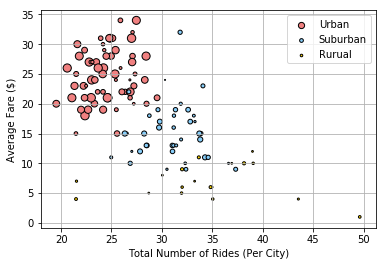

In [77]:
plt.scatter(urban_df.avg_fare, urban_df.number_of_rides, s=urban_df.driver_count, color="lightcoral", label="Urban", edgecolors="black")
plt.scatter(suburban_df.avg_fare, suburban_df.number_of_rides, s=suburban_df.driver_count, color="lightskyblue", label="Suburban", edgecolors="black")
plt.scatter(rurual_df.avg_fare, rurual_df.number_of_rides, s=rurual_df.driver_count, color="gold", label="Rurual", edgecolors="black")
plt.legend()
plt.grid(True)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.show()

In [78]:
#Percent of total fares by city type for pie chart
per_fare=city_df.groupby('type')['total_fare'].sum()
per_fare

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: total_fare, dtype: float64

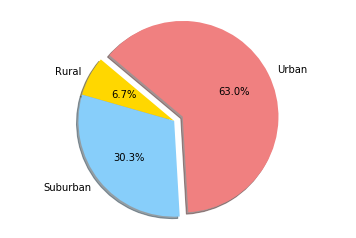

In [79]:
#Create pie Chart to illustrate % of total fares by city type

#Labels for sections of pie chart
labels = ["Rural" , "Suburban", "Urban"]
#The values for each secion of the pie chart
sizes = [4255.09, 19317.88, 40078.34]
#The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
# Tells matplotlib to separate the "Python" section from the others
explode = (0, 0, 0.1)
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()

In [80]:
#Percent of total rides by city type for pie chart
per_rides=city_df.groupby('type')['number_of_rides'].sum()
per_rides

type
Rural        125
Suburban     625
Urban       1625
Name: number_of_rides, dtype: int64

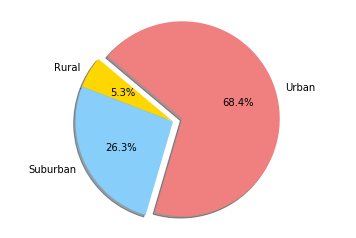

In [81]:
#Create pie Chart to illustrate % of total rides by city type

#Labels for sections of pie chart
labels = ["Rural" , "Suburban", "Urban"]
#The values for each secion of the pie chart
sizes = [125, 625, 1625]
#The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
# Tells matplotlib to separate the "Python" section from the others
explode = (0, 0, 0.1)
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()

In [82]:
#Percent of total drivers by city type for pie chart
per_drivers=city_df.groupby('type')['driver_count'].sum()
per_drivers

type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

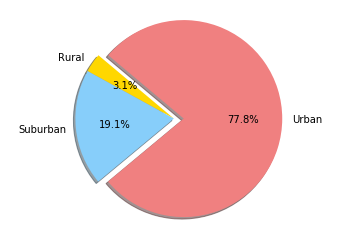

In [83]:
#Create pie Chart to illustrate % of total drivers by city type

#Labels for sections of pie chart
labels = ["Rural" , "Suburban", "Urban"]
#The values for each secion of the pie chart
sizes = [104, 638, 2607]
#The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
# Tells matplotlib to separate the "Python" section from the others
explode = (0, 0, 0.1)
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()